# Processes

This code perform some processes to generate data and recover the results obtained after running the model with different datasets. The objective is to recreate Figures 3 and 5 of our report about the article *Centers for Disease Control and Prevention as a Strategic Agent in the Pediatric Vaccine Market: An Analytical Approach*. 

It uses the tailor-made package **functions**, which contains the modules:

- **data** which generates the following datasets:
> - Triangular distribution of the parameters capacity, target profit, demand and gamma.
> - Different values of manufactures' capacity with the rest of the parameters constant.
> - Different values of manufactures' target profit with the rest of the parameters constant.

- **resultsprocessing** which takes the results obtained from NEOS and put them in a dataframe.

The code should be used following these steps:
- **Step 1:** Generate the data with triangular distribution, profit and capacity differences, using the function *get_data* and giving them an appropiate name. The files with the data will be stored in the folder *commands* of the current directory. These files will be used as **command** files when using NEOS Server.

- **Step 2:** Upload model, data and command files to NEOS Server (https://neos-server.org/neos/solvers/minco:BARON/AMPL.html) to run BARON. Model and data files can be found in folder *Model* of current directory. You will need to provide an e-mail, in which you will receive a message when the results are ready. You will need to repeat this step for each command file created in previous step.

- **Step 3:** Once the e-mail has been received, access the results by following the instructions. Copy and paste the results in a .txt file, name it appropiately and store it in the folder *results*.

- **Step 4:** Use the code in this notebook to recreate Figures 3 and 5.


## Step 1

In [1]:
#Import tailored packages for data generation and results processing
import functions.resultsprocessing as results
import functions.data as data

#Import required packages
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
help(data.get_data)

Help on function get_data in module functions.data:

get_data(triangular, profit, capacity, num_samples, file_name)
    Generates data to perform trials with triangular distribution,
    profit and capacity differences and store the results in txt file 
    with the required format to be input to NEOS.
    
    Input:
            triangular (binary):      Takes value 1 if triangular distribution is required,
                                                  0 otherwise
                                           
            profit (binary):          Takes value 1 if profit difference is required,
                                                  0 otherwise   
                                           
            capacity (binary):        Takes value 1 if capacity difference is required,
                                                  0 otherwise  
                                           
            num_samples (int):        Number of samples required
            
            f

In [3]:
#Get the capacity data, and solve the model with this data in NEOS
#Store NEOS results in Folder Data
data.get_data(0,0,1,10000,'capacity_commands.txt')

#Get the profit data, and solve the model with this data in NEOS
#Store NEOS results in Folder Data
data.get_data(0,1,0,10000,'profit_commands.txt')

#Get the triangular distribution data, and solve the model with this data in NEOS
#Store NEOS results in Folder Data
data.get_data(1,0,0,10000,'triangular_commands.txt')

## Step 2 and 3

Steps 2 and 3 are performed outside this notebook. See the intructions at the beginning of the notebook.

## Step 4

### Figure 3
* Reproduces Figure 3 of the article.
* Uses the results of the model obtained from NEOS with the triangular distribution data


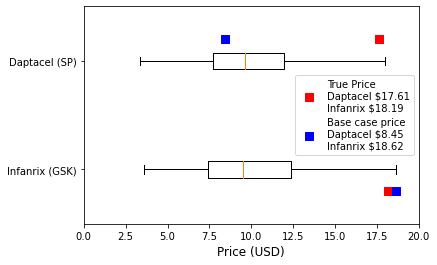

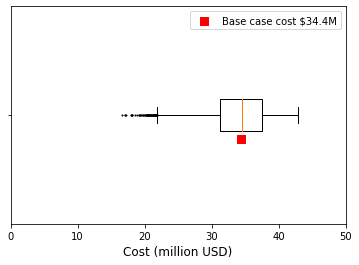

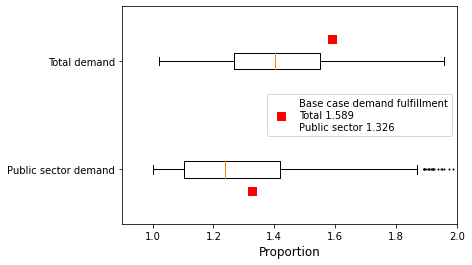

In [4]:
#Recovers the results from txt format extracted from NEOS and get them in dataframe
#Change the name of the file with the appropiate name
sensitivity = results.generate_dataframe('results/NEOS_triangular_results.txt')

#Computes demand fullfilment ratio and add it to dataframe
sensitivity = sensitivity[sensitivity['value_obj_func']!='Not feasible']
sensitivity['tot_d_fullfilment'] = (sensitivity['pub_q_infanrix'] + sensitivity['priv_q_infanrix'] +\
                                    sensitivity['pub_q_daptacel'] + sensitivity['priv_q_daptacel'])/\
                                    sensitivity['demand']

sensitivity['pub_d_fullfilment'] = (sensitivity['pub_q_infanrix']+\
                                    sensitivity['pub_q_daptacel'])/(0.57*sensitivity['demand'])

red_square = dict(markerfacecolor='None', marker='o', markeredgecolor='k',markeredgewidth=1,markersize = 1)

#---------------------------------------------- Plot figure 3 a)---------------------------------------------

fig1, ax1 = plt.subplots()
ax1.boxplot([sensitivity.pub_p_infanrix,sensitivity.pub_p_daptacel], vert = False, flierprops=red_square)

#Add reference points
plt.scatter(17.61,2.2, marker = 's', s=50,color = 'red', label = 'True Price\nDaptacel $17.61\nInfanrix $18.19')
plt.scatter(18.19,0.8, marker = 's', s=50,color = 'red')
plt.scatter(8.45,2.2, marker = 's', s=50,color = 'blue', label = 'Base case price\nDaptacel $8.45\nInfanrix $18.62')
plt.scatter(18.62,0.8, marker = 's', s=50,color = 'blue')

#Formatting
plt.yticks([1,2], ['Infanrix (GSK)','Daptacel (SP)'])
plt.xlabel('Price (USD)', fontsize = 'large')
plt.xlim(0, 20)
plt.legend()
plt.show()


#----------------------------------------------- Plot figure 3 b)---------------------------------------------

fig2, ax2 = plt.subplots()
ax2.boxplot(x =sensitivity.PubCost/1000000, vert = False, flierprops=red_square)

#Add reference points
plt.scatter(34.4,0.89, marker = 's', s=50,color = 'red', label = 'Base case cost $34.4M')

#Formatting
plt.legend()
plt.yticks([1], [''])
plt.xlim(0, 50)
plt.xlabel('Cost (million USD)', fontsize = 'large')
plt.show()



#---------------------------------------------- Plot figure 3 c)---------------------------------------------
fig3, ax3 = plt.subplots()
ax3.boxplot([sensitivity.pub_d_fullfilment,sensitivity.tot_d_fullfilment], \
            vert = False, flierprops=red_square)

#Add reference points
plt.scatter(1.589,2.2, marker = 's', s=50,color = 'red', \
            label = 'Base case demand fulfillment\nTotal 1.589\nPublic sector 1.326')
plt.scatter(1.326,0.8, marker = 's', s=50,color = 'red')

#Formatting
plt.legend(loc='center right')
plt.yticks([1,2], ['Public sector demand','Total demand'])
plt.xlabel('Proportion', fontsize = 'large')
plt.xlim(0.9, 2)
plt.show()

### Figure 5
* Reproduces Figure 5 of the article.
* Uses the results of the model obtained from NEOS with the capacity and profit data for figures 5a) and 5b), respectively.


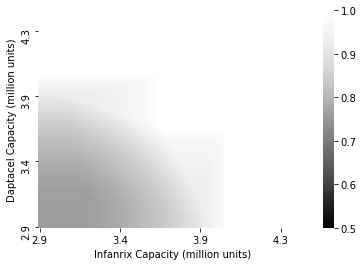

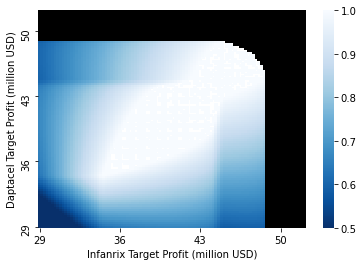

In [7]:

colormap=sns.color_palette("Greys_r", as_cmap=True)

#---------------------------------------------- Plot figure 5 a)---------------------------------------------
#Get capacity data
#Change the name of the file with the appropiate name
capacity_results = results.generate_dataframe('results/NEOS_capacity_results.txt')

#R calculation
C = capacity_results['P_infanrix'] - capacity_results['priv_p_infanrix']*capacity_results['priv_q_infanrix'] +\
capacity_results['P_daptacel'] - capacity_results['priv_p_daptacel']*capacity_results['priv_q_daptacel']

R = C/(capacity_results['pub_p_infanrix']*capacity_results['pub_q_infanrix'] + capacity_results['pub_p_daptacel']*capacity_results['pub_q_daptacel'])
capacity_results['R'] = R

#Get pivot table of R with capacity values
capacity = capacity_results.pivot(index='K_daptacel', columns = 'K_infanrix', values = 'R')

#Plot figure
ax = sns.heatmap(capacity, cmap = colormap, xticklabels=30, yticklabels=30,vmin=0.5, vmax=1, center= 0.75)

#Formatting
ax.invert_yaxis()
xlabels = ['{:,.1f}'.format(x) for x in ax.get_xticks()*1.6/100+2.9];
ylabels = ['{:,.1f}'.format(y) for y in ax.get_yticks()*1.6/100+2.9];
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)
ax.set_xlabel('Infanrix Capacity (million units)')
ax.set_ylabel('Daptacel Capacity (million units)')
plt.show()



#---------------------------------------------- Plot figure 5 b)---------------------------------------------
#Get profit data
#Change the name of the file with the appropiate name
profit_results = results.generate_dataframe('results/NEOS_profit_results.txt')

#R calculation
C = profit_results['P_infanrix'] - profit_results['priv_p_infanrix']*profit_results['priv_q_infanrix'] +\
    profit_results['P_daptacel'] - profit_results['priv_p_daptacel']*profit_results['priv_q_daptacel']

R = C/(profit_results['pub_p_infanrix']*profit_results['pub_q_infanrix'] + \
       profit_results['pub_p_daptacel']*profit_results['pub_q_daptacel'])

profit_results['R'] = R

#Get pivot table of R with capacity values
profit = profit_results.pivot(index='P_daptacel', columns = 'P_infanrix', values = 'R')

#Replace infinity values of R by 2
#This is a trick for plotting the graph properly
for i in range(profit.shape[0]):
    for j in range(profit.shape[1]):
        if profit.iloc[i,j]==np.inf:
            profit.iloc[i,j] = 2


#Plot figure            
colormap=sns.color_palette("Blues_r", as_cmap=True)
#This part of the plot ignores values over 1 (i.e. those which are originally infinity)
ax = sns.heatmap(profit, cmap = colormap, mask = profit > 1, xticklabels=30, yticklabels=30 ,vmin=0.5, vmax=1)

#This part of the plot considers  the values that were originally infinity
ax = sns.heatmap(profit, mask=profit < 2., cmap="Greys_r", cbar=False, xticklabels=30, yticklabels=30, center = 2,vmin=2, vmax=2)

#Formatting
ax.invert_yaxis()
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()*24/100+28.45];
ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*24/100+28.45];
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)
ax.set_xlabel('Infanrix Target Profit (million USD)')
ax.set_ylabel('Daptacel Target Profit (million USD)')
plt.show()

